# What caused the Challenger disaster?

Analysis by Venky Rao raove@us.ibm.com

## Background

Space shuttle Challenger was the second orbiter (after Columbia) of the U.S. space agency, NASA's space shuttle program.  The Space Shuttle orbiter was the reusable spaceplane component of the Space Shuttle program. Operated by NASA, this vehicle could carry astronauts and payloads into low Earth orbit, perform in-space operations, then re-enter the atmosphere and land as a glider, returning its crew and any on-board payload to the Earth.  Challenger launched and landed nine times before exploding and breaking apart 73 seconds into its tenth mission, on January 28, 1986, resulting in the death of all seven crew members, including a civilian school teacher. (Source: Wikipedia)

An investigation ensued into the reliability of the shuttle's propulsion system.  The explosion was eventually traced to the failure of one of the three field joints on one of the two solid booster rockets. Each of these six field joints includes two O-rings, designated as primary and secondary, which fail when phenomena called erosion and blowby both occur.  To better understand the relationship between failure and physical conditions experieced (temperature and pressure), a dataset was collected by David Draper of UCLA.

This dataset contains 23 observations, one for each space shuttle flight carried out before the Challenger was launched on its ultimate journey.  It contains the following attributes:
1. Number of O-rings at risk on a given flight 
2. Number experiencing thermal distress 
3. Launch temperature (degrees F) 
4. Leak-check pressure (psi) 
5. Temporal order of flight

The coolest temperature at launch among all 23 flights before the Challenger's last flight was 53 °F.  Forecasts for January 28, 1986 predicted an unusually cold morning, with temperatures close to −1 °C (30 °F), the minimum temperature permitted for launch.  The Shuttle was never certified to operate in temperatures that low.  The O-rings, as well as many other critical components, had no test data to support any expectation of a successful launch in such conditions.  Despite several objections from the engineering teams, NASA went ahead with the launch.  The spacecraft disintegrated over the Atlantic Ocean, off the coast of Cape Canaveral, Florida, at 11:39 EST, a mere 73 seconds into its flight. (Source: Wikipedia)

Disintegration of the vehicle began after an O-ring seal in its right Solid Rocket Booster (SRB) failed at liftoff. Its failure caused a breach in the SRB joint it sealed, allowing pressurized burning gas from within the solid rocket motor to reach the outside and impinge upon the adjacent SRB aft field joint attachment hardware and external fuel tank. This led to the separation of the right-hand SRB's aft field joint attachment and the structural failure of the external tank.  Consequently, aerodynamic forces broke up the orbiter. (Source: Wikipedia)

## Focus of my analysis

My analysis focuses on understanding the relationship between the response variable (number of O-rings experiencing thermal distress) and the two predictor variables (1. launch temperature; and 2. leak-check pressure).  I will begin my analysis by examining these three numerical variables independently.  Then I will try to understand the relationship between the response variable and each of the predictor variables using covariance and correlation analysis.  Next, based on the results of the correlation analysis, I will fit a linear regression model between the response variable and the predictor variable with which it shares a greater correlation.  Finally, I will create a prediction equation to predict the number of O-rings experiencing distress based on the predictor variable with which it shares a greater correlation.  My analysis will also include relevant charts / graphs.

## Dataset

I downloaded the dataset from the following url: https://archive.ics.uci.edu/ml/datasets/Challenger+USA+Space+Shuttle+O-Ring

I then stored the dataset (file = "orings.csv") into an object store on IBM's Bluemix platform-as-a-service (https://www.ibm.com/cloud-computing/bluemix/).  I then accessed this data from the object store and imported into an R Jupyter notebook that I created using IBM's Data Science Experience (https://datascience.ibm.com/).  I stored the data into an R data frame called "orings".

The cells below shows the process of importing the data into my R Jupyter notebook.  Most of the content in this cell is hidden since it includes my credentials to access my object storage.

In [1]:
# The code was removed by DSX for sharing.

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



The cell below prints the dataset in its entirety as well printing its structure:

In [2]:
orings #prints the entire dataset
str(orings) #prints the structure of the dataset

OringsAtRisk OringsThermalDistress LaunchTempDegF LeakCheckPressurePsi
1  6            0                     66              50                 
2  6            1                     70              50                 
3  6            0                     69              50                 
4  6            0                     68              50                 
5  6            0                     67              50                 
6  6            0                     72              50                 
7  6            0                     73             100                 
8  6            0                     70             100                 
9  6            1                     57             200                 
10 6            1                     63             200                 
11 6            1                     70             200                 
12 6            0                     78             200                 
13 6            0                     67             200                 
14 6            2                     53             200                 
15 6            0                     67             200                 
16 6            0                     75             200                 
17 6            0                     70             200                 
18 6            0                     81             200                 
19 6            0                     76             200                 
20 6            0                     79             200                 
21 6            0                     75             200                 
22 6            0                     76             200                 
23 6            1                     58             200                 
   TemporalOrderOfFlight
1   1                   
2   2                   
3   3                   
4   4                   
5   5                   
6   6                   
7   7                   
8   8                   
9   9                   
10 10                   
11 11                   
12 12                   
13 13                   
14 14                   
15 15                   
16 16                   
17 17                   
18 18                   
19 19                   
20 20                   
21 21                   
22 22                   
23 23

'data.frame':	23 obs. of  5 variables:
 $ OringsAtRisk         : num  6 6 6 6 6 6 6 6 6 6 ...
 $ OringsThermalDistress: num  0 1 0 0 0 0 0 0 1 1 ...
 $ LaunchTempDegF       : num  66 70 69 68 67 72 73 70 57 63 ...
 $ LeakCheckPressurePsi : num  50 50 50 50 50 50 100 100 200 200 ...
 $ TemporalOrderOfFlight: num  1 2 3 4 5 6 7 8 9 10 ...


As can be seen from the output, the "orings" dataset has 23 observations and 5 variables.  All 5 variables are numeric.  For additional information on the variables in the dataset, see here: https://archive.ics.uci.edu/ml/machine-learning-databases/space-shuttle/o-ring-erosion.names.

## Exploring the variables in the dataset

### O-rings at risk

Each solid booster rocket has three field joints that each have 2 O-rings.  Therefore, the total number of O-rings at risk in any space shuttle flight is 3 X 2 = 6 O-rings.  You can see that, by definition (and indeed by design), every observation in the dataset has 6 O-rings at risk.  Therefore, this variable does not have any bearing on the Challenger disaster and can be ignored in the remainder of our analysis.

### O-rings experiencing thermal distress

This variable is our response variable, that is, this is the variable we are trying to predict.  The Challenger space shuttle disaster occurred as a result of an O-ring failure, a leading indicator of which is an O-ring experiencing thermal distress.  Our analysis of this variable is provided below:

In [3]:
summary(orings$OringsThermalDistress) #summary "OringsThermalDistress"
table(orings$OringsThermalDistress)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3043  0.5000  2.0000 


 0  1  2 
17  5  1 

From the above result, we can see that O-rings experiencing thermal distress is a discrete numerical variable.  Of the 23 observations, in 17 cases, none of the O-rings experienced thermal distress, in 5 cases, 1 O-ring experienced thermal distress and in 1 case, 2 O-rings experienced thermal distress.  A dotchart of this variable is provided below:

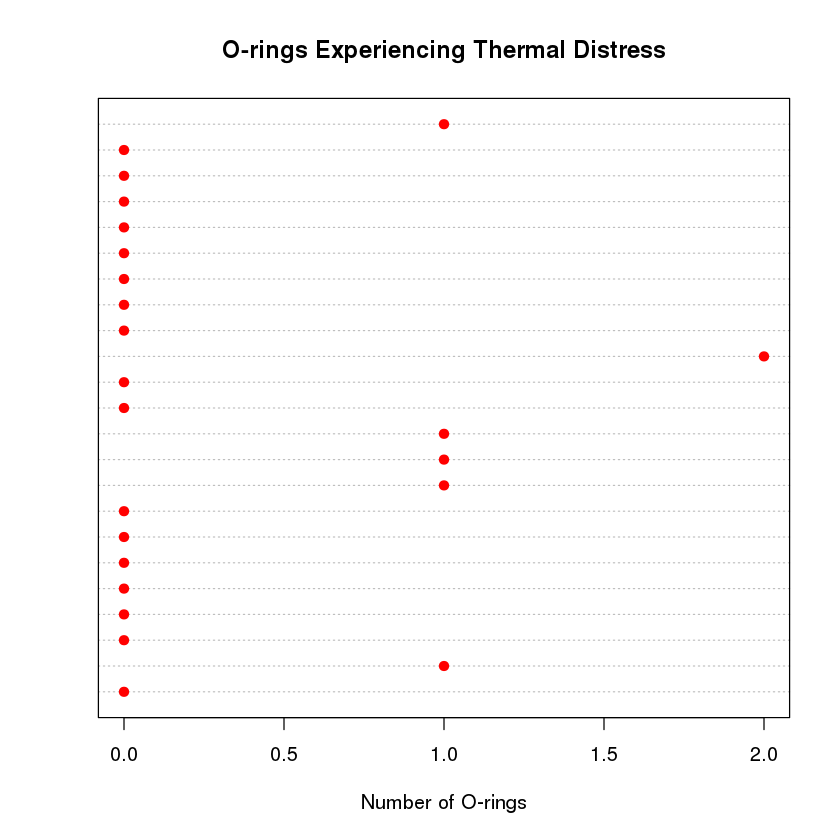

In [4]:
dotchart(orings$OringsThermalDistress, main = "O-rings Experiencing Thermal Distress", col = "red", pch = 19, xlab = "Number of O-rings")

Another way of visually representing this variable is through a Histogram and a Desnity curve.  Here, we plot probability densities instead of the frequencies on the y-axis.  From the output produced below, you can tell that chance of zero O-rings experiencing thermal distress is approximately 3 times the chance of 1 O-ring experiencing thermal distress and > 15 times the chance of 2 O-rings experiencing thermal distress.

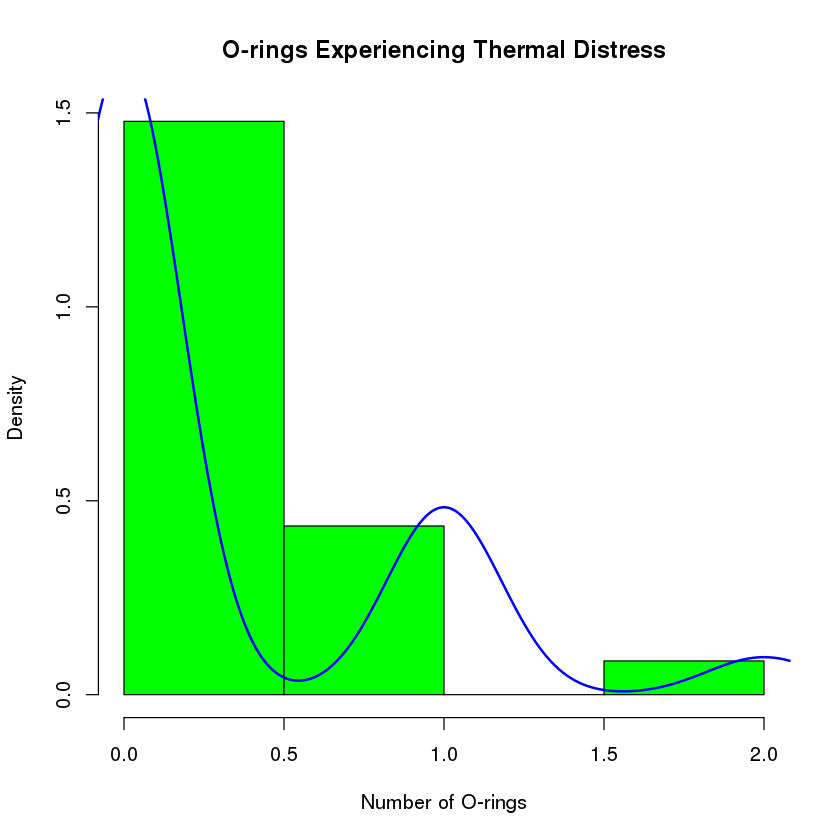

In [5]:
hist(orings$OringsThermalDistress, main = "O-rings Experiencing Thermal Distress", col = "green", xlab = "Number of O-rings", freq = F)
lines(density(orings$OringsThermalDistress), col = "blue", lwd = 2) #adds a density curve

### Launch temperature in degrees Farenheight

This variable is one of our predictor variables.  From the analysis below, we can see that in the 23 flights prior to the Challeger's final flight, the mean launch temperature was 69.57 °F with the median being 70 °F.  The lowest launch temperature recorded was 53 °F which is much higher than the temperature recorded on the day of the Challenger's final launch (30 °F or below freezing).

In [6]:
summary(orings$LaunchTempDegF)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  53.00   67.00   70.00   69.57   75.00   81.00 

A good way of visually representing this variable is by using a kernel density plot.  The code below generates this plot:

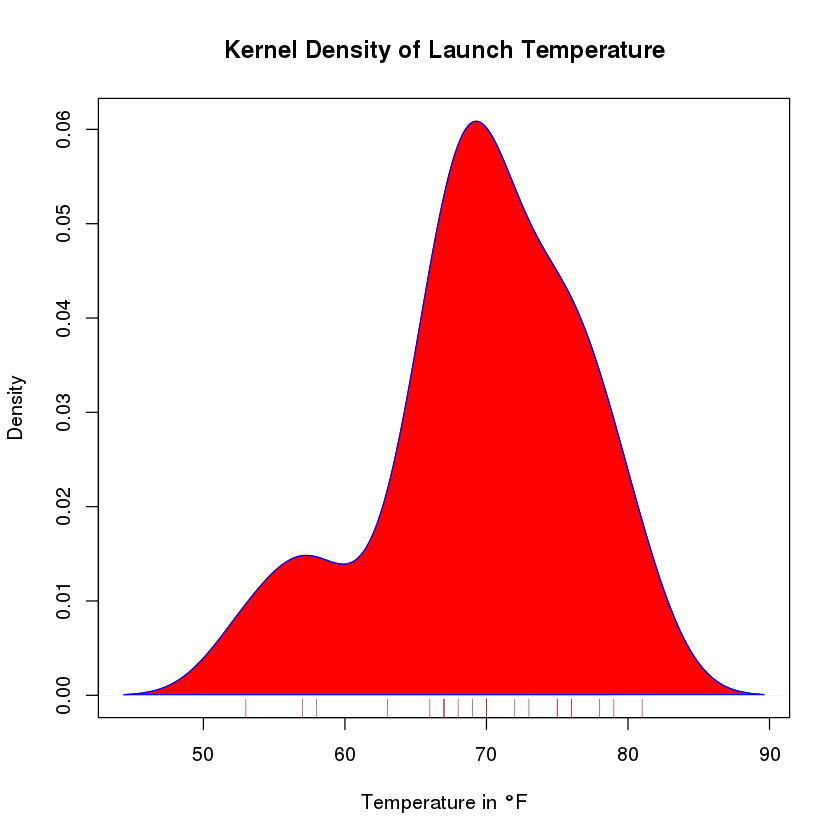

In [7]:
d <- density(orings$LaunchTempDegF) #stores the density in object d
plot(d, main = "Kernel Density of Launch Temperature", xlab = "Temperature in °F") #creates a minimal graph with a title
polygon(d, col = "red", border = "blue") #colors the curve blue and fills the area under the curve with red
rug(orings$LaunchTempDegF, col = "brown") #adds a brown rug, i.e. creates a set of tick marks along the base of a plot

From the chart, you can tell that the distribution is bimodal and slightly skewed to the left which is why the mean (69.7 °F) is slightly below the median (70 °F).  Another way of representing this data visually is by using a box plot as shown below:

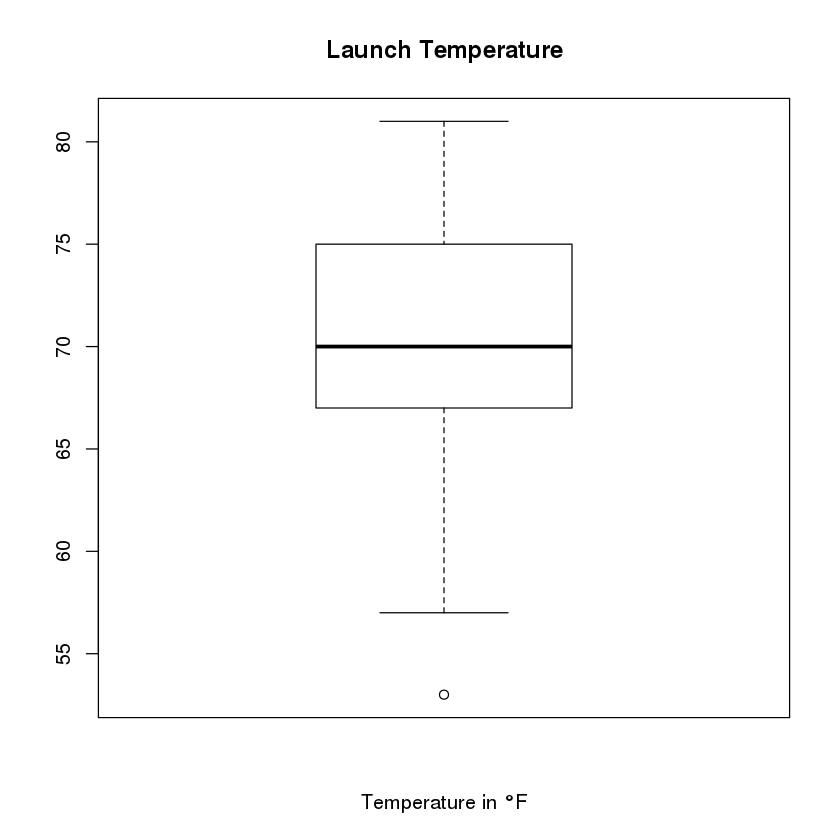

In [8]:
boxplot(orings$LaunchTempDegF, data = orings, #formula, data
       main = "Launch Temperature", #title
       xlab = "Temperature in °F") #x-axis label

From the chart above, you can tell that 53 °F is an outlier (< 1.5 times the Interquartile Range).  By examining the dataset, you can also tell that this value was recorded for flight #14 and that was the only flight in our dataset where the number of O-rings experiencing thermal pressure was equal to 2.  This appears to suggest that a lower launch temperature may be associated with an increase in the number of O-rings experiencing thermal pressure.

### Leak-check pressure per square inch

This variable is one of our predictor variables.  Our analysis is provided below.

In [9]:
summary(orings$LeakCheckPressurePsi)
table(orings$LeakCheckPressurePsi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0    75.0   200.0   152.2   200.0   200.0 


 50 100 200 
  6   2  15 

From the above result, we can see that Leak-check Pressure is a discrete numerical variable. Of the 23 observations, in 6 cases, the pressure was 50, in 2 cases the pressure was 100 and in 15 cases the pressure was 200. A dotchart of this variable is provided below:

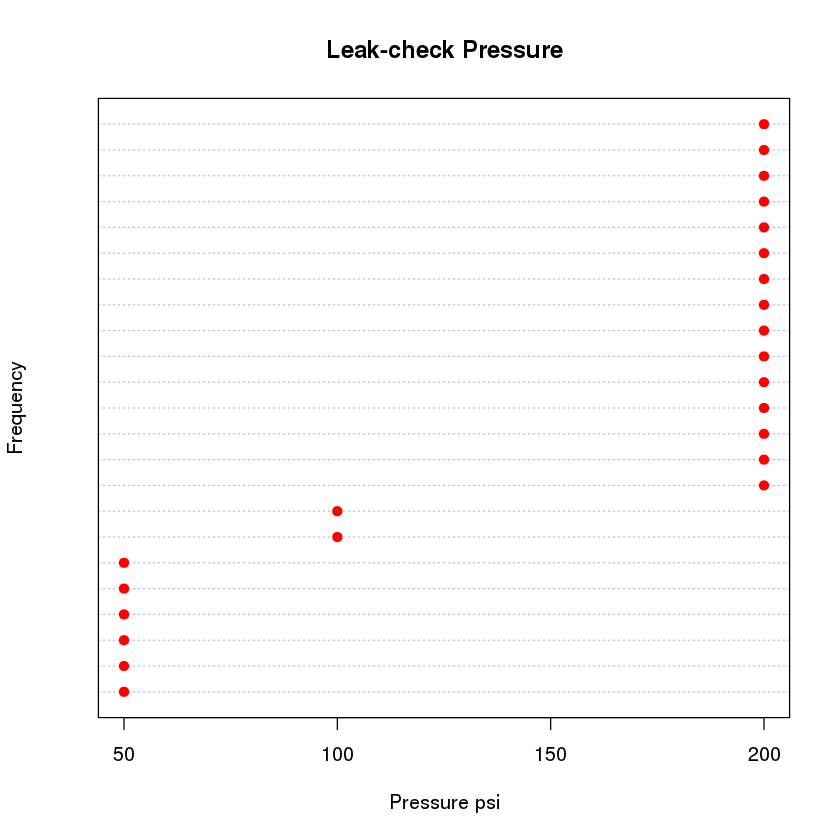

In [10]:
dotchart(orings$LeakCheckPressurePsi, main = "Leak-check Pressure", col = "red", pch = 19, xlab = "Pressure psi", ylab = "Frequency")

From the dataset, we can observe that with the exception of 1 case of an O-ring experiencing thermal distress at a leak-check pressure of 50 psi, all other instances of O-ring(s) experiencing thermal distress occurred when the leak-check pressure was 200 psi.

### Temporal order of flights

This variable is simply a temporal ordering of flight numbers and can therefore be ignored in the remainder of our analysis.

### Key learning from this section

The key learning from this section is that for future analysis, we should consider the relationship between the O-rings expriencing thermal pressure with the launch temperature and the leak-check pressure.

## Covariance and correlation analysis

### O-rings experiencing thermal pressure and launch temperature

From the code below, we can see that these two variables have a covariance of -2.86.  This suggests a negative linear relationship, i.e., when temperature reduces, the number of O-rings experiencing thermal pressure appears to rise.  The correlation coefficient of -0.73 confirms this negative relationship and additionally suggests that this relationship is very strong.

In [11]:
round(stats::cov(orings$OringsThermalDistress, orings$LaunchTempDegF), 2)

[1] -2.86

In [12]:
round(stats::cor(orings$OringsThermalDistress, orings$LaunchTempDegF), 2)

[1] -0.73

We can confirm this relationship visually by creating a scatterplot as follows:

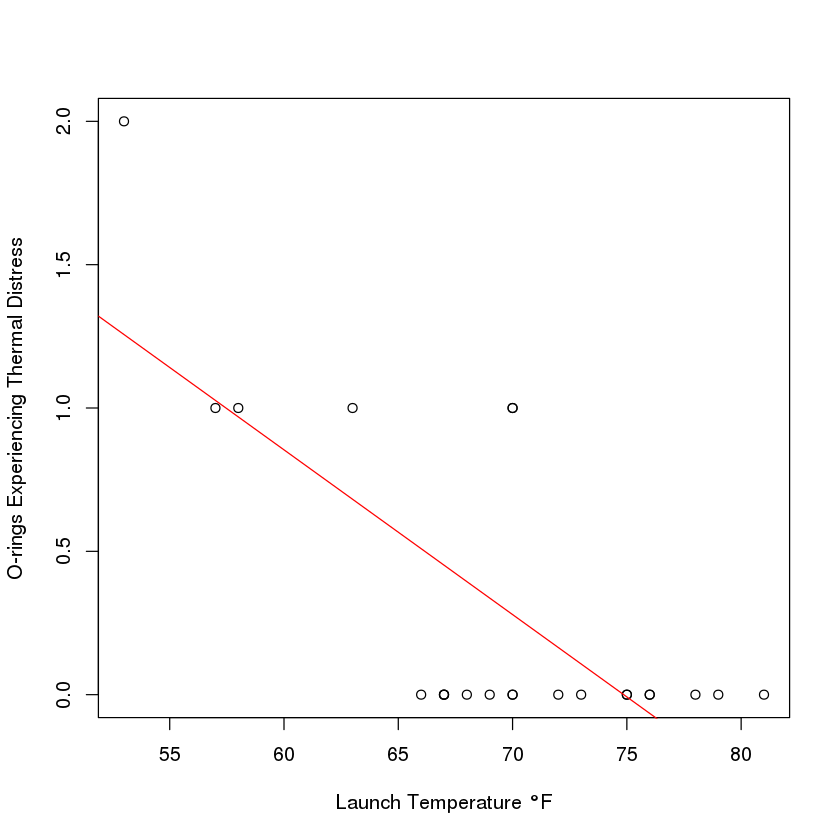

In [13]:
plot(orings$LaunchTempDegF, orings$OringsThermalDistress, xlab = "Launch Temperature °F", ylab = "O-rings Experiencing Thermal Distress")
abline(lm(orings$OringsThermalDistress ~ orings$LaunchTempDegF), col = "red") #adds a line of fit to the scatter plot

### O-rings experiencing thermal pressure and leak-check pressure

From the code below, we can see that these two variables have a covariance of 8.4. This suggests a positive linear relationship, i.e., when pressure reduces, the number of O-rings experiencing thermal pressure appears to reduce. The correlation coefficient of 0.22 confirms this positive relationship but suggests that this relationship is weak to moderate at best.

In [14]:
round(stats::cov(orings$OringsThermalDistress, orings$LeakCheckPressurePsi), 2)

[1] 8.4

In [15]:
round(stats::cor(orings$OringsThermalDistress, orings$LeakCheckPressurePsi), 2)

[1] 0.22

We can confirm this relationship visually by creating a scatterplot as follows:

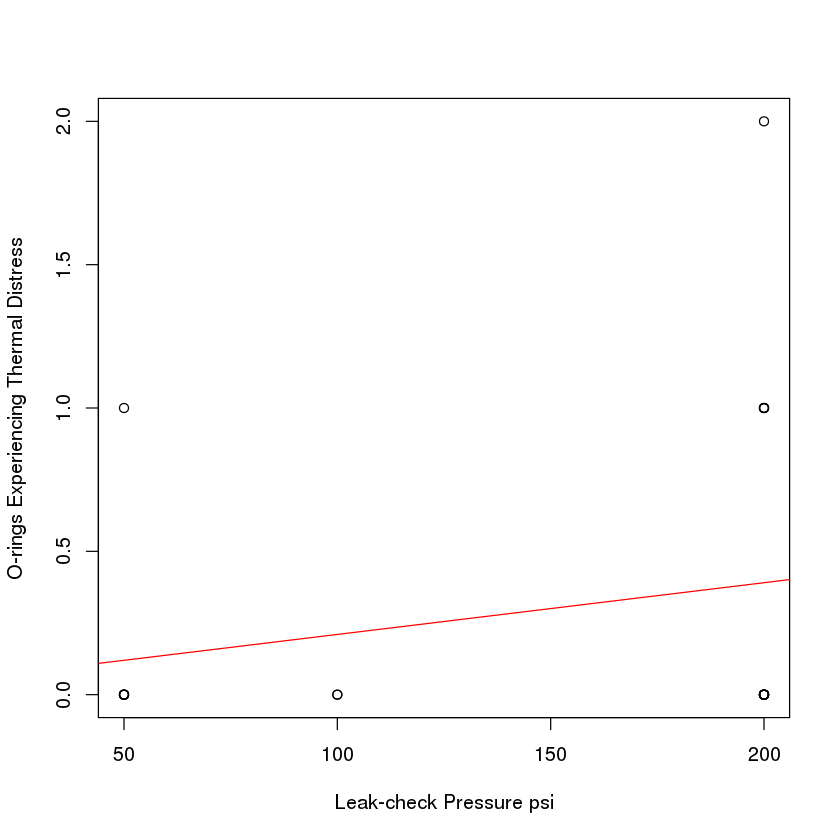

In [16]:
plot(orings$LeakCheckPressurePsi, orings$OringsThermalDistress, xlab = "Leak-check Pressure psi", ylab = "O-rings Experiencing Thermal Distress")
abline(lm(orings$OringsThermalDistress ~ orings$LeakCheckPressurePsi), col = "red") #adds a line of fit to the scatter plot

### Launch temperature and leak-check pressure

From the code below, we can see that these two variables have a covariance of 19.17. This suggests a positive linear relationship, i.e., when the launch temperature reduces, the pressure appears to reduce and vice versa. However, the correlation coefficient of 0.04 confirms that this relationship is almost non-existent.

In [17]:
round(stats::cov(orings$LaunchTempDegF, orings$LeakCheckPressurePsi), 2)

[1] 19.17

In [18]:
round(stats::cor(orings$LaunchTempDegF, orings$LeakCheckPressurePsi), 2)

[1] 0.04

### Key learning from this section

The key learning from this section is that for future analysis, we should only consider the relationship between the O-rings experiencing thermal pressure as the response variable and the launch temperature as the predictor variable.

## Simple Linear Regression between O-rings experiencing thermal distress and launch temperature

The code below fits a simple linear regression model between these two variables and displays the summary and coefficients of the model.

In [19]:
fit <- lm(OringsThermalDistress ~ LaunchTempDegF, data = orings)
summary(fit)
coef(fit)


Call:
lm(formula = OringsThermalDistress ~ LaunchTempDegF, data = orings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50921 -0.30810  0.00794  0.20905  0.74381 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.30159    0.83110   5.176 3.96e-05 ***
LaunchTempDegF -0.05746    0.01189  -4.833 8.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3935 on 21 degrees of freedom
Multiple R-squared:  0.5266,	Adjusted R-squared:  0.5041 
F-statistic: 23.36 on 1 and 21 DF,  p-value: 8.895e-05


(Intercept) LaunchTempDegF 
    4.30158730    -0.05746032

The results of the simple linear regression are as follows:
1. The intercept of 4.3 suggests that 4.3 O-rings would experience thermal distress if the launch temperature were 0 °F.
2. The slope of -0.06 confirms the negative relationship and suggests that for every 1 °F increase in launch temperature, the number of O-rings experiencing thermal distress would reduce by 0.06.
3. The multiple R-squared (0.53) and the adjusted R-squared (0.5) suggest that approximately 50% of the variation in the number of O-rings experiencing thermal distress can be explained by the launch temperature.

This clearly shows a strong relationship between these two variables.  Next, we will use this model to create a prediction of the number of O-rings likely to experience thermal distress based on the launch temperature. 

## Predictive model based on simple linear regression

The following code produces the predictive model based on the simple linear regression model created above:

In [20]:
intercept <- fit$coefficients[1] #store the intercept in a separate object
intercept

(Intercept) 
   4.301587

In [21]:
slope <- fit$coefficients[2] #store the slope in a separate object
slope

LaunchTempDegF 
   -0.05746032

In [22]:
#create a prediction function
predict <- function(tempF) {
    fitted <- round((intercept + (slope * tempF)))
    text <- "O-rings likely experiencing thermal distress = "
    return (paste(text, fitted))
}

We can now use our "predict" function to predict the number of O-rings likely to fail based on the actual launch temperature recorded during the Challenger's final flight (approximately 30 °F), as follows:

In [23]:
predict(30)

[1] "O-rings likely experiencing thermal distress =  3"

As can be seen from our predictive model, the number of O-rings likely experiencing thermal distress is 3, which is greater than any of our observations.  This level of thermal distress turned out to be catastrophic for the Challenger.

## Conclusion

While this dataset and my analysis above demonstrates a strong negative linear relationship between the number of O-rings experiencing failure and the launch temperature, we can only conclude that an association exists between these two variables but cannot state that a causal relationship exists (that is, correlation does not imply causation) since this is an observational study.

However, my analysis confirms the reservations expressed by the engineers prior to launch and their reluctance to approve the launch without analyzing additional data.  You can read more about this here: https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster#January_28_launch_and_failure and watch a documentary on this topic here: https://www.youtube.com/watch?v=2FehGJQlOf0.